In [1]:
from duckduckgo_search import ddg_images
from fastcore.all import *

def search_images(term, max_images=20): 
    print(f"searching for term '{term}'")
    return L(ddg_images(term, max_results=max_images)).itemgot('image')

In [2]:
??L # this is a list

Object `L # this is a list` not found.


In [3]:
carriers = ['Aetna', 'UHC', 'BCBS', 'Kaiser']

In [4]:
def search_insurance_cards(carrier, max_images=20):
    return search_images(f"'{carrier}' insurance card", max_images)

In [5]:
test_url = search_insurance_cards("Aetna", 1)[0]

searching for term ''Aetna' insurance card'


/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


In [6]:
test_url

'https://hr.vanderbilt.edu/benefits/images/AetnaCard.PNG'

In [7]:
from fastai.vision.all import *

In [8]:
path = Path('cards')
from time import sleep

for carrier in carriers:
    dest = (path/carrier)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_insurance_cards(carrier, max_images=50))
    resize_images(path/carrier, max_size=400, dest=path/carrier)
    sleep(10)  # Pause between searches to avoid over-loading server


searching for term ''Aetna' insurance card'


/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/duckduckgo_search/compat.py:60: UserWarning: ddg_images is deprecated. Use DDGS().images() generator
  warnings.warn("ddg_images is deprecated. Use DDGS().images() generator")
/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/duckduckgo_search/compat.py:64: UserWarning: parameter page is deprecated
  warnings.warn("parameter page is deprecated")
/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/duckduckgo_search/compat.py:66: UserWarning: parameter max_results is deprecated
  warnings.warn("parameter max_results is deprecated")


searching for term ''UHC' insurance card'
searching for term ''BCBS' insurance card'
searching for term ''Kaiser' insurance card'


/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/PIL/Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [9]:
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

26

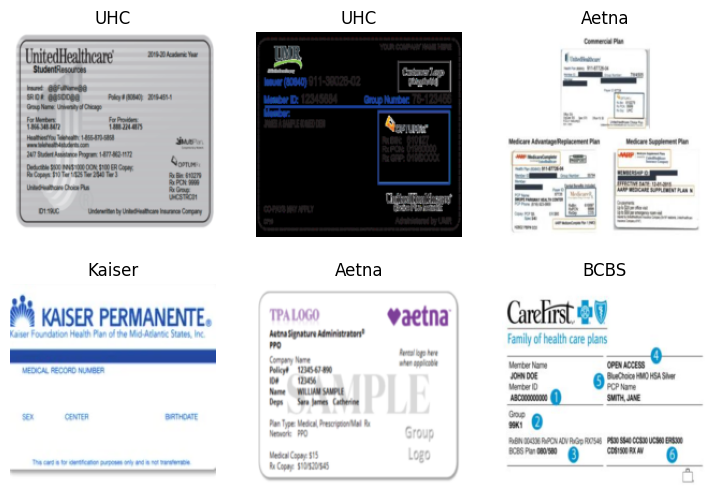

In [10]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [11]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(6)

/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/ethan/.pyenv/versions/3.8.16/lib/python3.8/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.582439,0.609775,0.177570,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.397010,0.071884,0.009346,00:04
1,0.270316,0.012026,0.000000,00:03
2,0.208658,0.013905,0.000000,00:03
3,0.162902,0.014251,0.018692,00:03
4,0.124393,0.001256,0.000000,00:03
5,0.102323,0.001852,0.000000,00:03


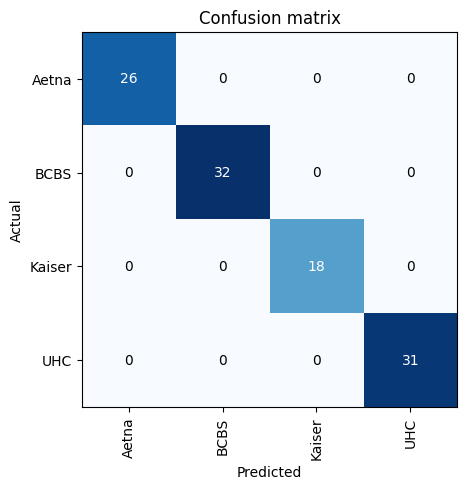

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

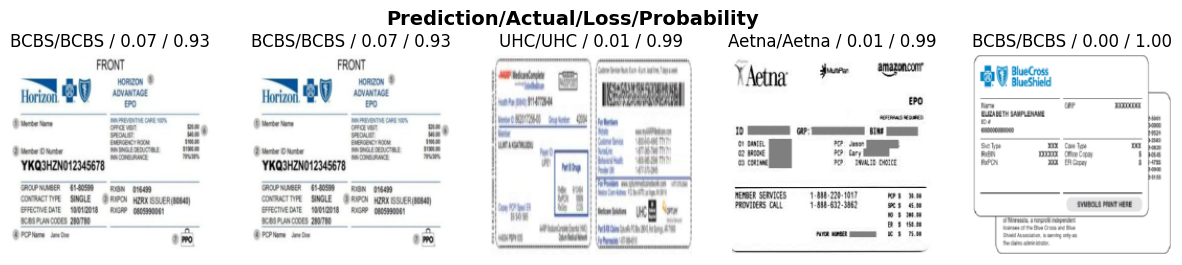

In [13]:
interp.plot_top_losses(5, nrows=1)

In [15]:
learn.export()